In [1]:
import os
os.environ['OMP_NUM_THREADS']='2'
os.environ['LD_LIBRARY_PATH']=''
os.environ['CUDA_LAUNCH_BLOCKING']='1'

In [2]:
from data_generation import *
from utils import *
from upscaling import UpScale
from scipy.linalg import sqrtm

/home/pz281@ad.eng.cam.ac.uk/anaconda3/envs/torch/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
N_low = 16
N_high = 64
l = 0.5
sigma = 0.01

In [4]:
w_low, r_low, A_low, x_low, y_low = generate_data(N_low)
w_high, r_high, A_high, x_high, y_high = generate_data(N_high)

In [10]:
G = gaussian_kernal(x_high,y_high,l,sigma,N_high)

In [6]:
r_sample = np.random.multivariate_normal(r_high.ravel(),G)

Text(0.5, 0.92, 'high-res')

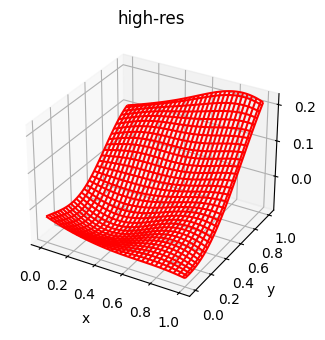

In [7]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(121, projection='3d')
X, Y = np.meshgrid(x_high, y_high)
ax1.plot_wireframe(X, Y, r_sample.reshape(64,64),color='r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('w')
ax1.set_title('high-res')

In [18]:
mean, covariance = u_low_prior(l,sigma,N_high)

In [19]:
w_high_sample = np.random.multivariate_normal(mean.ravel(),covariance)

Text(0.5, 0.92, 'low-res')

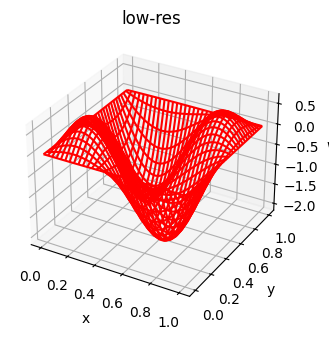

In [20]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(121, projection='3d')
X, Y = np.meshgrid(x_high, y_high)
ax1.plot_wireframe(X, Y, w_high_sample.reshape(64,64),color='r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('w')
ax1.set_title('low-res')